In [2]:
N = ord("K") % 3 + 1
print("Variant " + str(N))

Variant 1


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Функція для завантаження даних із CSV файлу
def load_column_from_csv(file_path, column_name):
    with open(file_path, mode='r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        column_data = [int(row[column_name]) for row in csv_reader if row[column_name]]
        return np.array(column_data)
        
# Функція для завантаження дат
def load_column_dates(file):
    with open(file, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        date_idx = header.index('date')
        return [datetime.strptime(row[date_idx], '%Y-%m-%d') for row in reader]

# Завантаження дат
file_path = 'russia_losses_equipment.csv'
dates = load_column_dates(file_path)

In [14]:
# Фільтрація втрат за літо 2022 року
def filter_summer_2022_losses(dates, losses):
    summer_start = datetime(2022, 6, 1)
    summer_end = datetime(2022, 8, 31)
    summer_indices = [
        i for i, date in enumerate(dates)
        if summer_start <= date <= summer_end
    ]
    summer_losses = losses[summer_indices]
    return np.sum(summer_losses)

# Завантаження даних про втрати літаків
aircraft_losses = load_column_from_csv(file_path, 'aircraft')

# Щоденні втрати літаків
daily_aircraft_losses = np.abs(np.diff(aircraft_losses))  # Рахуємо різницю між днями і беремо за модулем (позитивні значення)

In [18]:
# Пошук і виведення днів із втратами літаків більше 0
daily_losses_greater_than_zero = np.where(daily_aircraft_losses > 0)

# Витяг відповідних дат і втрат
dates_greater_than_zero = np.array(dates)[daily_losses_greater_than_zero]
losses_greater_than_zero = daily_aircraft_losses[daily_losses_greater_than_zero]


# Виводимо добові втрати літаків, включно з тими, що дорівнюють 1
dates_losses = np.array(dates[1:])  # використовуємо дати починаючи з другого дня для різниці


for date, loss in zip(dates_losses, daily_aircraft_losses):
    if loss > 0:  # Якщо втрати більші за 0
        print(f"Дата: {date}, Втрати літаків: {loss}")

Дата: 2024-10-08 00:00:00, Втрати літаків: 1
Дата: 2024-10-02 00:00:00, Втрати літаків: 1
Дата: 2024-09-11 00:00:00, Втрати літаків: 1
Дата: 2024-08-27 00:00:00, Втрати літаків: 1
Дата: 2024-08-14 00:00:00, Втрати літаків: 1
Дата: 2024-08-07 00:00:00, Втрати літаків: 1
Дата: 2024-08-04 00:00:00, Втрати літаків: 2
Дата: 2024-07-23 00:00:00, Втрати літаків: 1
Дата: 2024-07-19 00:00:00, Втрати літаків: 1
Дата: 2024-07-07 00:00:00, Втрати літаків: 1
Дата: 2024-06-27 00:00:00, Втрати літаків: 1
Дата: 2024-06-10 00:00:00, Втрати літаків: 1
Дата: 2024-06-09 00:00:00, Втрати літаків: 1
Дата: 2024-05-25 00:00:00, Втрати літаків: 1
Дата: 2024-05-23 00:00:00, Втрати літаків: 1
Дата: 2024-05-22 00:00:00, Втрати літаків: 1
Дата: 2024-05-17 00:00:00, Втрати літаків: 1
Дата: 2024-05-16 00:00:00, Втрати літаків: 2
Дата: 2024-05-13 00:00:00, Втрати літаків: 1
Дата: 2024-05-11 00:00:00, Втрати літаків: 1
Дата: 2024-05-04 00:00:00, Втрати літаків: 1
Дата: 2024-04-19 00:00:00, Втрати літаків: 1
Дата: 2024

In [15]:
# Три найбільші добові втрати літаків
top_3_losses = np.sort(daily_aircraft_losses)[-3:]

# Літні втрати 2022 року (з 1 червня до 31 серпня 2022 року)
summer_losses = filter_summer_2022_losses(dates, daily_aircraft_losses)


# Середнє значення втрат авіації за останні 300 днів
average_losses_last_300_days = np.mean(daily_aircraft_losses[-300:])

# Выводим результаты
print(f"Три найбільші добові втрати літаків: {top_3_losses}")
print(f"Кількість літаків, збитих влітку 2022 року: {summer_losses}")
print(f"Середнє значення втрат авіації за останні 300 днів: {average_losses_last_300_days:.2f}")

Три найбільші добові втрати літаків: [ 9 16 17]
Кількість літаків, збитих влітку 2022 року: 26
Середнє значення втрат авіації за останні 300 днів: 0.91


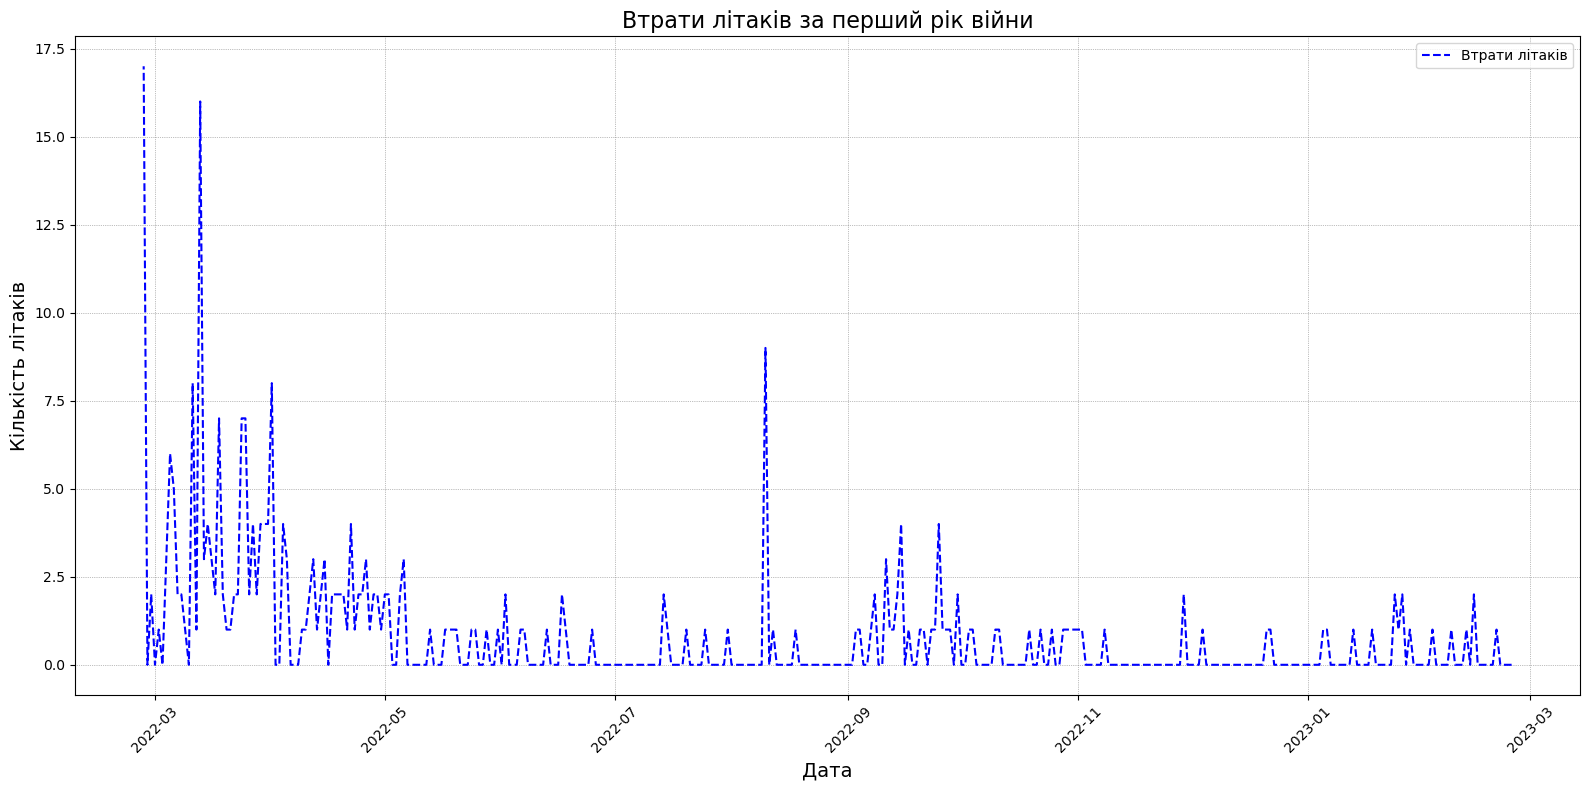

In [19]:
# Визначення початкової та кінцевої дати першого року війни
start_date = min(dates)  # Мінімальна дата зі списку вже у форматі datetime
end_date = start_date.replace(year=start_date.year + 1)  # Збільшуємо рік на 1

# Знаходження індексів для першого року
year_indices = np.array([i for i, date in enumerate(dates) if start_date <= date < end_date])

# Обмежуємо індекси до довжини масиву втрат
valid_indices = year_indices[year_indices < len(daily_aircraft_losses)]  # Убираем индексы, выходящие за пределы массива потерь
year_losses = daily_aircraft_losses[valid_indices]
year_dates = np.array(dates)[valid_indices]

# Побудова графіка
plt.figure(figsize=(16, 8), dpi=100)

plt.plot(year_dates, year_losses, linestyle='--', color='b', label='Втрати літаків')

plt.title('Втрати літаків за перший рік війни', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кількість літаків', fontsize=14)
plt.legend()
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('aircraft_losses_first_year.png', format='png')

plt.show()